In [7]:
from distance_analysis_utils.generation import *
from distance_analysis_utils.embeddings import *
from distance_analysis_utils.analysis import *
import numpy as np

# Here I try to find evidence for/against the embedding distance hypothesis

## Prerequisites

### Datasets

I use two main artificial datasets generators:

1. **Clicks(d)** - contains d graphs, $\{ G_1, \ldots, G_{d} \}$, where $G_i$ is a click of size $i$ united with $d - i$ isolated vertices.

2. **RandomEdgesRemoval(d)** - contains $\frac{d (d - 1)}{2}$ graphs $\{ G_1, \ldots, G_{\frac{d (d - 1)}{2}} \}$, $G_i$ is received by removing an edge from $G_{i - 1}$ with equal probabilities for each of the edges.


And additional two:

3. **ComplicatedClicks(d)** - contains d graphs, $\{ G_1, \ldots, G_{d} \}$, where $G_i$ is a click of size $i$
united with $d - i$ vertices connected to vertex 0.

4. **RandomMEdges(d, m)** - contains $\frac{d (d - 1)}{2}$ graphs $\{ G_1, \ldots, G_{\frac{d (d - 1)}{2}} \}$, $G_i$ is received by removing an edge from $G_{i - 1}$ with equal probabilities for each of the edges.

### Graph distances

1. **Edit Distance** - number of edit operations, needed to transform one graph to the other.

### Embedding distances

1. **Euclidian distance** - $\|f(G_1) - f(G_2) \|$ where $f$ is an embedding function.

## Analysis pipeline

For the main considered datasets compute distances arrays $dists = \{\operatorname{graphdist}(G_0, G_0), \operatorname{graphdist}(G_0, G_1), \ldots, \operatorname{graphdist}(G_n, G_n) \}$ of distances between each element and the element 0.

For the main considered datasets **Clicks** and **RER** it's obvious from the construction that $\forall i$ $dist_{i + 1} \geq  dist_{i}$.

Distance arrays are computed for $j = 1, \ldots N$ **Clicks(j)** or **RER(j)**. Then for each distance array corresponding $c$, which make the hypothesis condition true, is computed. If hypothesis is correct, than the growth of $c$ is has a finite upper bound.


Same can be done for the additional datasets too.

In [8]:
def analyse(g_file, e_file, title, c_max, approx):
    graph_distances = np.load(g_file)
    embed_distances = np.load(e_file)
    plot_dependencies(graph_distances, embed_distances, title)
    optimal_c = find_c(graph_distances, embed_distances, c_max, approx)
    test_hypothesis(graph_distances, embed_distances, cs=[optimal_c * 0.7, optimal_c, optimal_c * 1.3])
    print(f'Optimal c: {optimal_c:.2f}')
    plot_hypothesis(graph_distances, embed_distances, cs=[optimal_c * 0.7, optimal_c, optimal_c * 1.3], title=title, xtitle='Edit Distance', ytitle='Euclidian Distance')
    c_growth = find_c_growth(graph_distances, embed_distances, c_max, approx)
    plot_c_growth(c_growth, ds_title=title)

In [9]:
def find_optimal_cs(g_file, e_file, c_max, approx=0.01):
    graph_distances = np.load(g_file)
    embed_distances = np.load(e_file)
    optimal_c = find_c(graph_distances, embed_distances, c_max, approx)
    cs=[optimal_c * 0.7, optimal_c, optimal_c * 1.3]
    return cs

In [10]:
def plot_c_dependencies(g_file, e_file, title, c_max, cs=None, bounds='both'):
    graph_distances = np.load(g_file)
    embed_distances = np.load(e_file)
    if not cs:
        cs = find_optimal_cs(g_file, e_file, c_max)
    test_hypothesis(graph_distances, embed_distances, cs=cs)
    plot_hypothesis(graph_distances, embed_distances, cs=cs,
                    title=title, xtitle='Edit Distance', ytitle='Euclidian Distance', bounds=bounds)

# AWE Embeddings

## Clicks50

1195.4666137696333: upper bound errs - 5, low bound errs - 0)
1707.8094482423335: upper bound errs - 0, low bound errs - 0)
2220.1522827150334: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [1707.81, 2220.15]
Optimal c: 1707.81


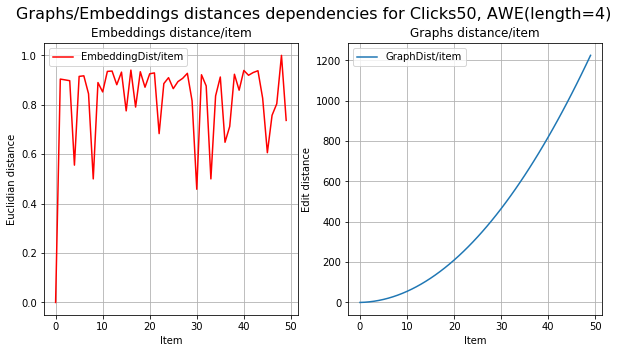

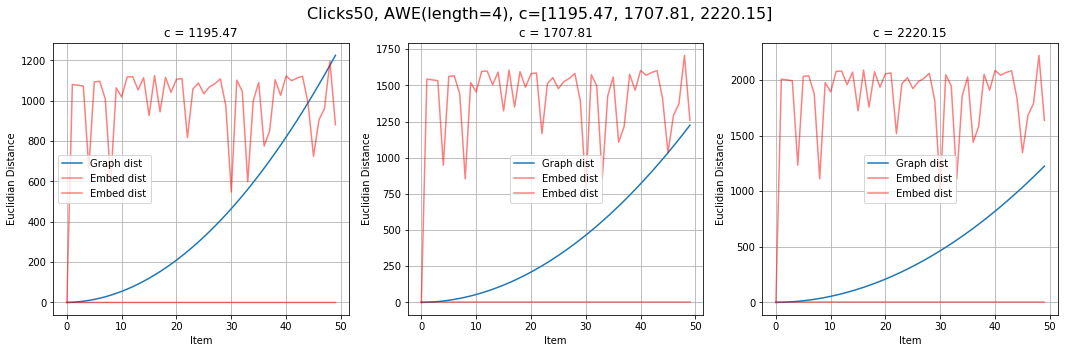

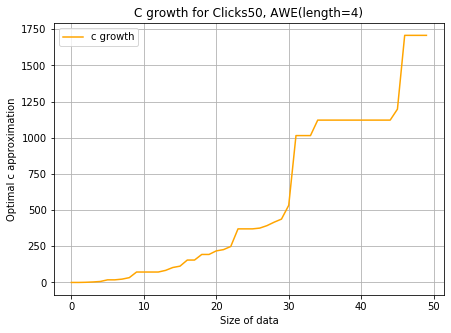

In [4]:
analyse('data/click50_gdist.npy', 'data/click50_edist.npy', 'Clicks50, AWE(length=4)', 2000, 0.01)

## RER20

61999.270319939045: upper bound errs - 3, low bound errs - 0)
88570.3861713415: upper bound errs - 0, low bound errs - 0)
115141.50202274395: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [88570.39, 115141.5]
Optimal c: 88570.39


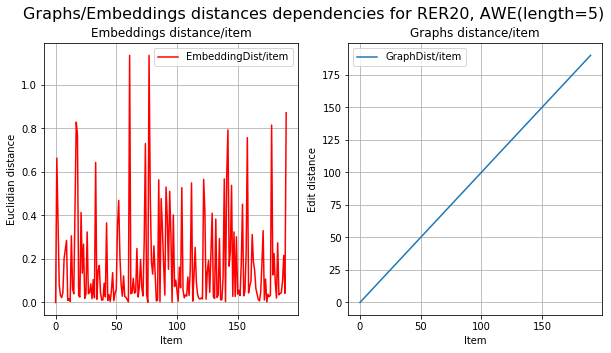

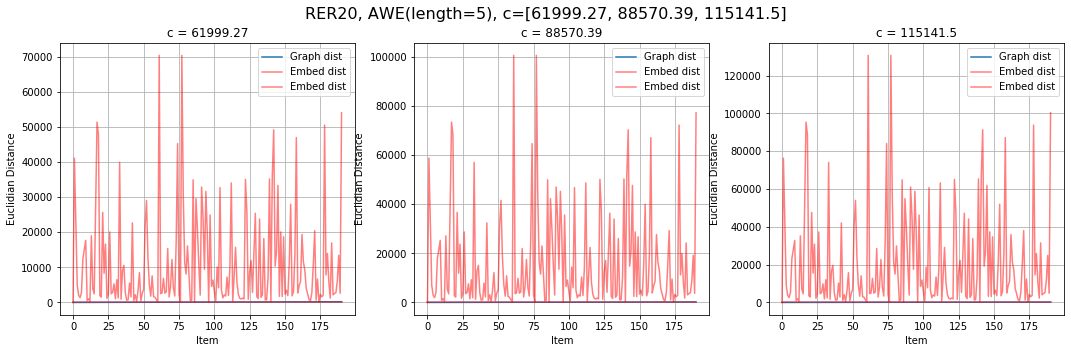

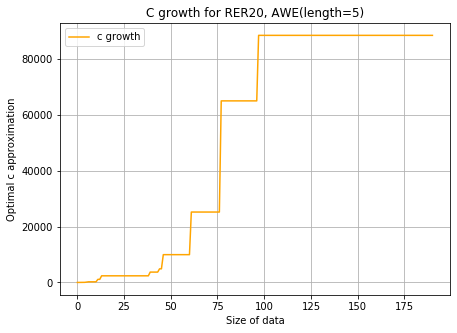

In [5]:
analyse('data/rer20_gdist.npy', 'data/rer20_edist.npy', 'RER20, AWE(length=5)', 200000, 0.01)

In [17]:
cs = find_optimal_cs('data/rer20_gdist.npy', 'data/rer20_edist.npy', 200000, 0.01)

61999.270319939045: upper bound errs - 3, low bound errs - 0)
88570.3861713415: upper bound errs - 0, low bound errs - 0)
115141.50202274395: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [88570.39, 115141.5]


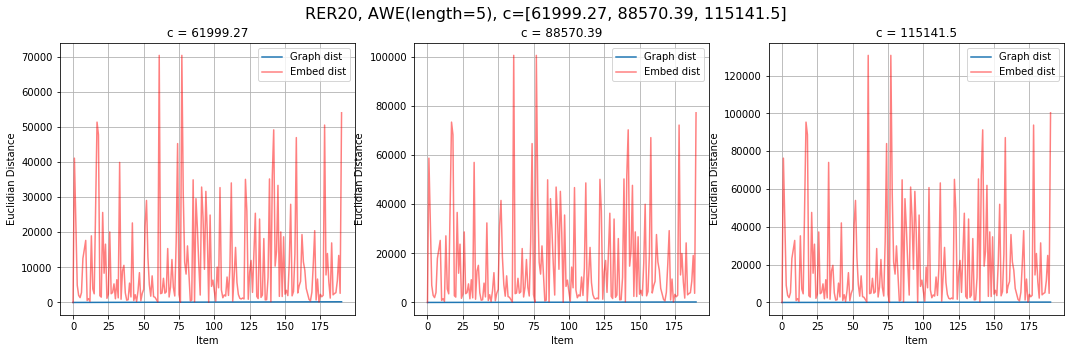

In [19]:
plot_c_dependencies('data/rer20_gdist.npy', 'data/rer20_edist.npy', 'RER20, AWE(length=5)', cs=cs, bounds='upper')

61999.270319939045: upper bound errs - 3, low bound errs - 0)
88570.3861713415: upper bound errs - 0, low bound errs - 0)
115141.50202274395: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [88570.39, 115141.5]


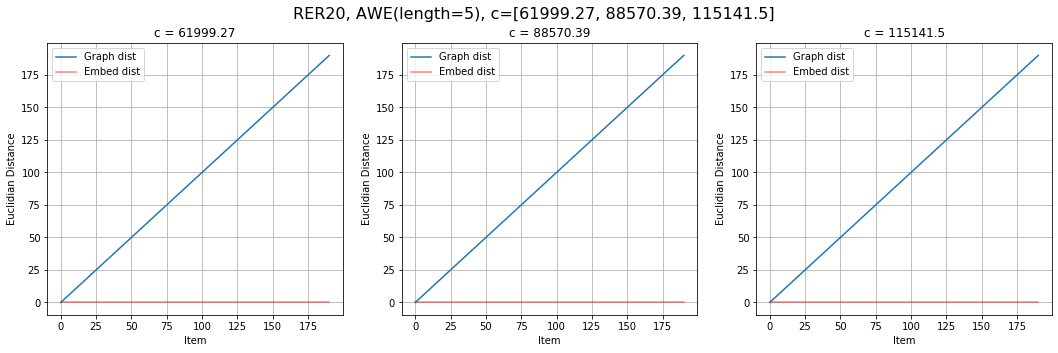

In [20]:
plot_c_dependencies('data/rer20_gdist.npy', 'data/rer20_edist.npy', 'RER20, AWE(length=5)', cs, bounds='lower')

# Graphlet embeddings

## Clicks50

47.52044677801999: upper bound errs - 0, low bound errs - 18)
67.88635254002855: upper bound errs - 0, low bound errs - 0)
88.25225830203712: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [67.89, 88.25]
Optimal c: 67.89


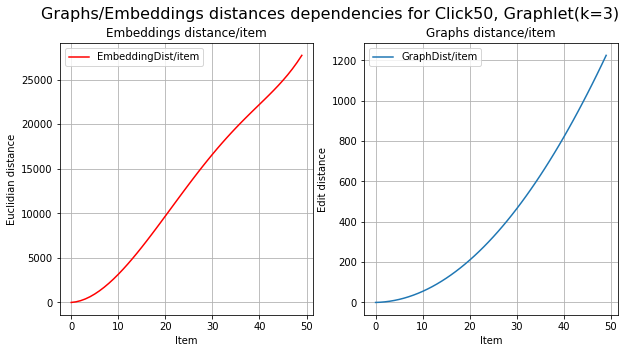

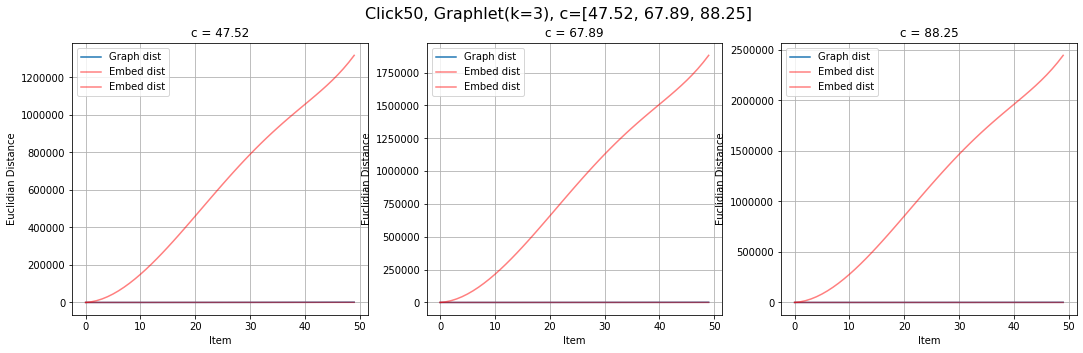

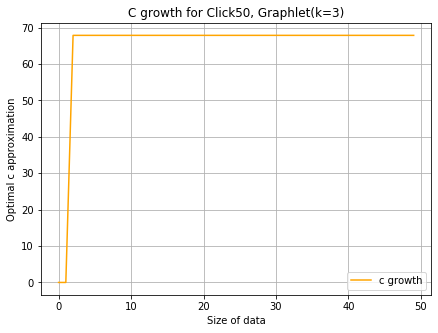

In [6]:
analyse('data/click50_graphlet_gdist.npy', 'data/click50_graphlet_edist.npy', 'Click50, Graphlet(k=3)', 2000, 0.01)

47.52044677801999: upper bound errs - 0, low bound errs - 18)
67.88635254002855: upper bound errs - 0, low bound errs - 0)
88.25225830203712: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [67.89, 88.25]


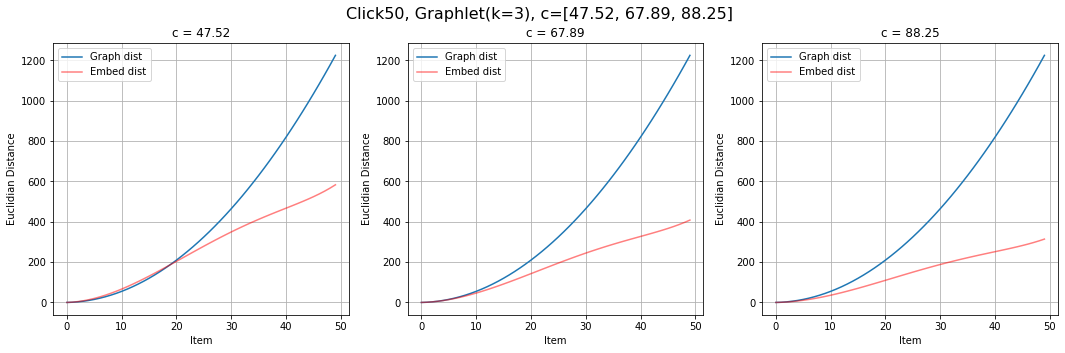

In [25]:
plot_c_dependencies('data/click50_graphlet_gdist.npy', 'data/click50_graphlet_edist.npy', 'Click50, Graphlet(k=3)', 2000, bounds='lower')

## RER50

27.72293090888926: upper bound errs - 0, low bound errs - 103)
39.604187012698944: upper bound errs - 0, low bound errs - 0)
51.48544311650863: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [39.6, 51.49]
Optimal c: 39.60


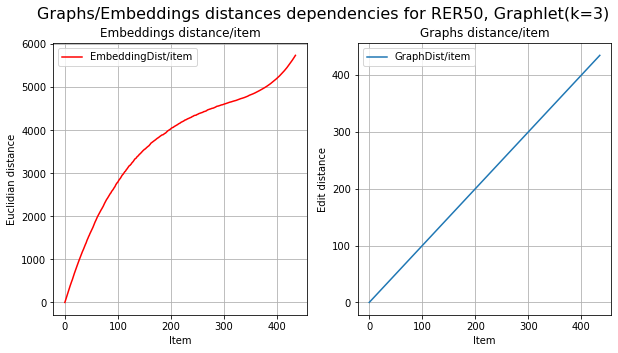

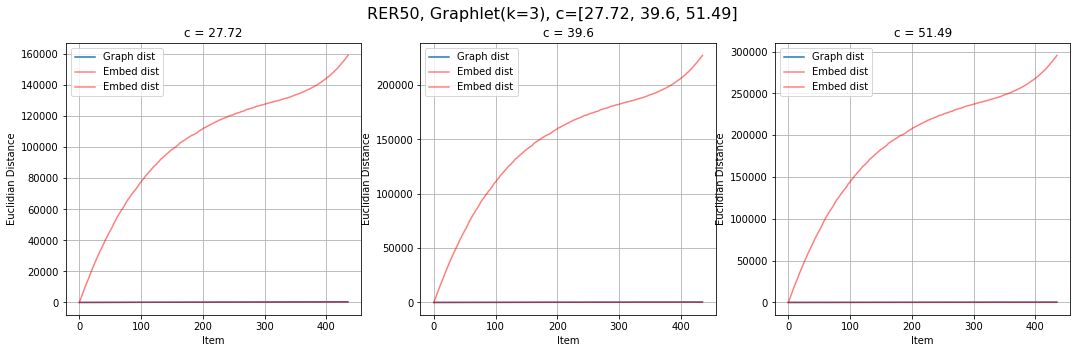

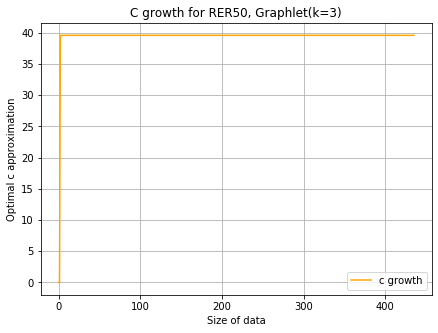

In [8]:
analyse('data/rer50_graphlet_gdist.npy', 'data/rer50_graphlet_edist.npy', 'RER50, Graphlet(k=3)', 2000, 0.01)

27.72: upper bound errs - 0, low bound errs - 103)
39.6: upper bound errs - 0, low bound errs - 0)
51.49: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [39.6, 51.49]


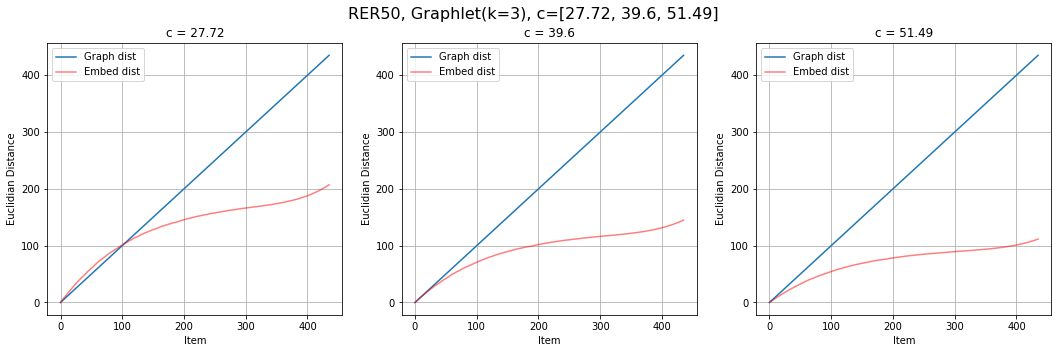

In [27]:
plot_c_dependencies('data/rer50_graphlet_gdist.npy', 'data/rer50_graphlet_edist.npy', 'RER50, Graphlet(k=3)', 200, cs=[27.72, 39.6, 51.49], bounds='lower')

# WL embeddings

## Clicks500


123.49744338350287: upper bound errs - 150, low bound errs - 0)
176.42491911928983: upper bound errs - 0, low bound errs - 0)
229.35239485507677: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [176.42, 229.35]
Optimal c: 176.42


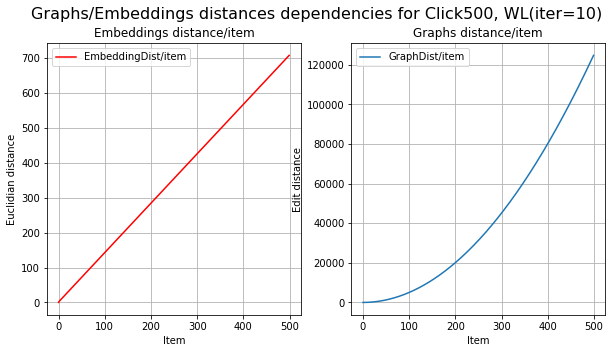

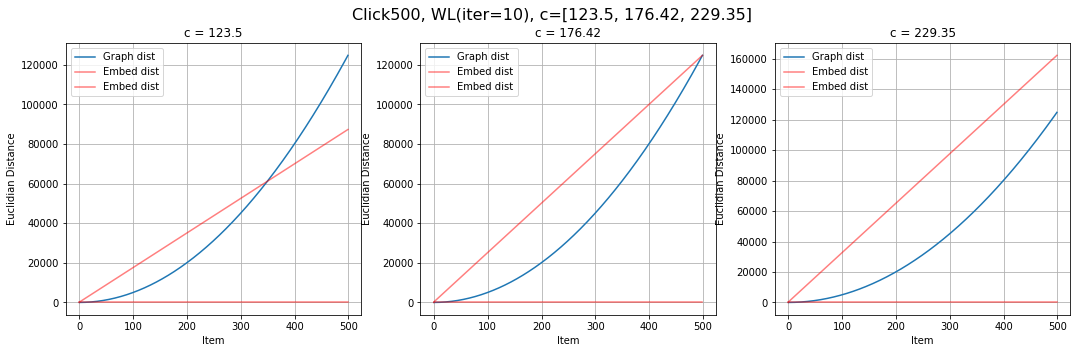

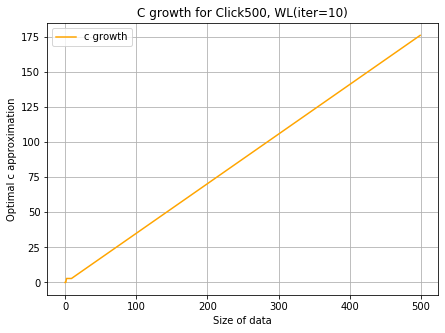

In [11]:
analyse('data/WL_Clicks500_gdist.npy', 'data/WL_Clicks500_edist.npy', 'Click500, WL(iter=10)', 200000000000, 0.01)

## RER100

98.02356362412829: upper bound errs - 0, low bound errs - 1)
140.03366232018328: upper bound errs - 0, low bound errs - 0)
182.04376101623828: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [140.03, 182.04]
Optimal c: 140.03


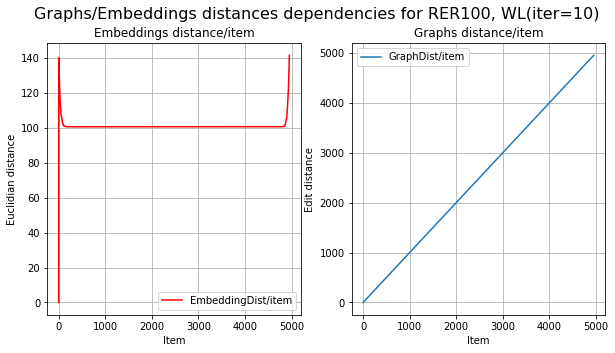

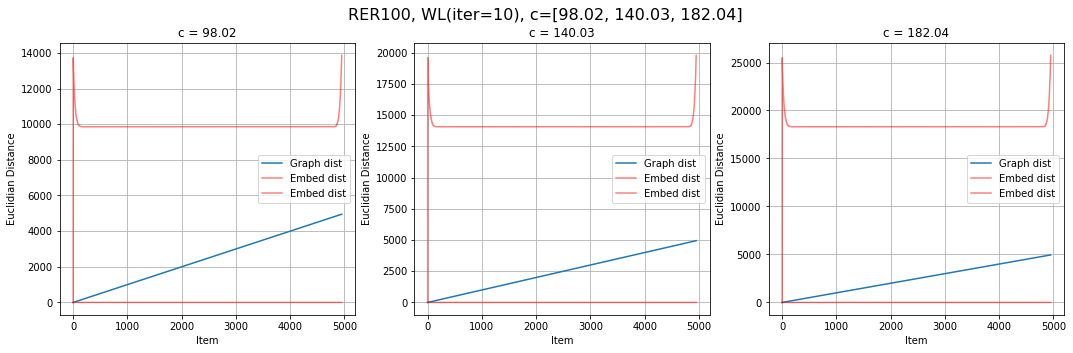

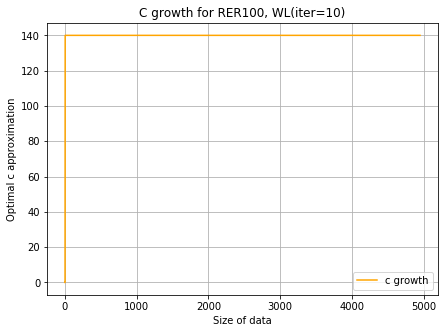

In [12]:
analyse('data/WL_RER100_gdist.npy', 'data/WL_RER100_edist.npy', 'RER100, WL(iter=10)', 2000000, 0.01)

98.02093505924472: upper bound errs - 0, low bound errs - 1)
140.02990722749246: upper bound errs - 0, low bound errs - 0)
182.0388793957402: upper bound errs - 0, low bound errs - 0)
Hypothesis is correct for c in [140.03, 182.04]


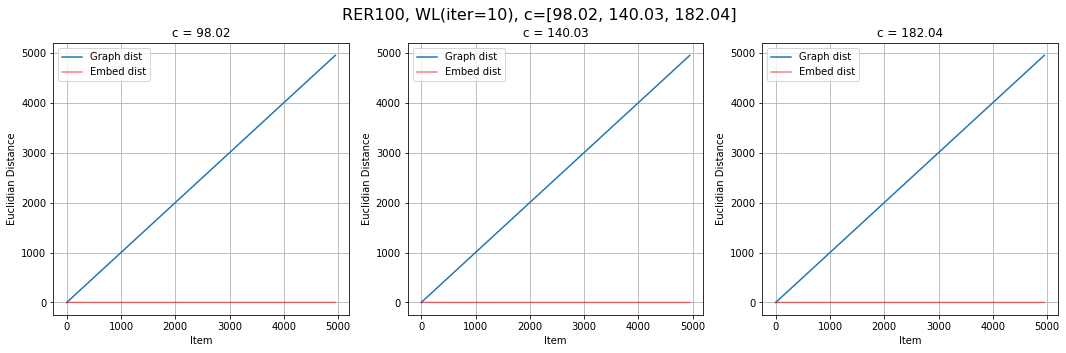

In [13]:
plot_c_dependencies('data/WL_RER100_gdist.npy', 'data/WL_RER100_edist.npy', 'RER100, WL(iter=10)', 2000, bounds='lower')

In [15]:
rer100_gdist = np.load('data/WL_RER100_gdist.npy')
rer100_edist = np.load('data/WL_RER100_edist.npy')

Text(0.5, 1.0, 'WL, RER100(iter=10), c=1')

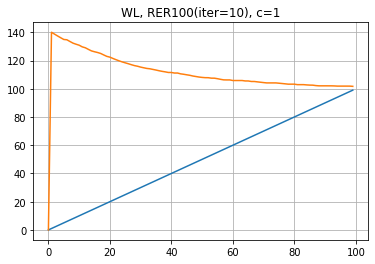

In [22]:
plt.plot(rer100_gdist[:100], label='Graph distance')
plt.plot(rer100_edist[:100], label='Lower bound')
plt.grid()
plt.title('WL, RER100(iter=10), c=1')